## Load your genome

In [1]:
import pandas as pd
import numpy as np

In [2]:
snp_calls = pd.read_table('genome_Hong_ChangBum_Full_20100816082459.txt',
                       comment='#', names=['name', 'chrom', 'position', 'genotype'],
                       low_memory=False)

chrom_human_order = lambda x: 'chr{:03d}'.format(int(x[0:])) if x[0:].isdigit() else x
snp_calls['chrom_sortkey'] = snp_calls['chrom'].apply(chrom_human_order)
snp_calls=snp_calls.sort_values(by=['chrom_sortkey','position']).reset_index(drop=True)
snp_calls.head()

,name,chrom,position,genotype,chrom_sortkey
0,i4001200,MT,3,T,MT
1,i4000964,MT,43,C,MT
2,i4001177,MT,46,T,MT
3,i4000987,MT,49,A,MT
4,i4000979,MT,51,T,MT


In [3]:
by_chr=snp_calls.groupby('chrom_sortkey')
by_chr.count().head()

,name,chrom,position,genotype
chrom_sortkey,,,,
MT,2133,2133,2133,2133
X,13876,13876,13876,13876
Y,1921,1921,1921,1921
chr001,43972,43972,43972,43972
chr002,46393,46393,46393,46393


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

['MT' 'X' 'Y' 'chr001' 'chr002' 'chr003' 'chr004' 'chr005' 'chr006'
 'chr007' 'chr008' 'chr009' 'chr010' 'chr011' 'chr012' 'chr013' 'chr014'
 'chr015' 'chr016' 'chr017' 'chr018' 'chr019' 'chr020' 'chr021' 'chr022']


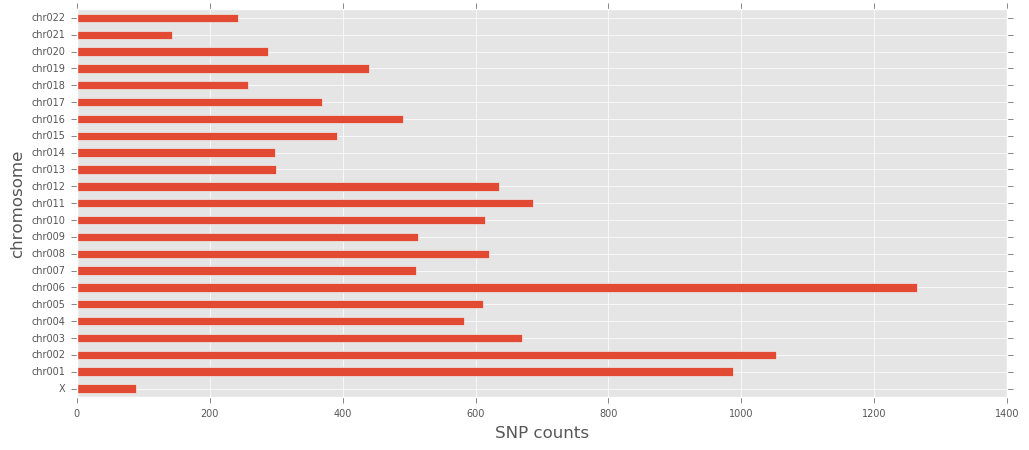

In [18]:
plot=by_chr.count()['name'].plot(kind="barh", fontsize=13,figsize=(12,5))
plot.tick_params(axis='both', which='major', labelsize=7)
plot.tick_params(axis='both', which='minor', labelsize=7)

chromosomes=snp_calls['chrom_sortkey'].unique()
print chromosomes
plt.xlabel('SNP counts')
plt.ylabel('chromosome')

### Load GWAS Catalog

In [6]:
# https://www.ebi.ac.uk/gwas/api/search/downloads/full

In [7]:
gwas_df=pd.read_table("gwas_catalog_v1.0-associations_e86_r2016-10-09.tsv",low_memory=False,)

In [8]:
gwas_df.head()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
0,2009-09-28,18403759,Ober C,2008-04-09,N Engl J Med,www.ncbi.nlm.nih.gov/pubmed/18403759,Effect of variation in CHI3L1 on serum YKL-40 ...,YKL-40 levels,632 Hutterite individuals,"443 European ancestry cases, 491 European ance...",...,upstream_gene_variant,0.0,0.29,1.000000e-13,13.000000,NaN,0.30,[NR] ng/ml decrease,Affymetrix [290325],N
1,2008-06-16,18369459,Liu Y,2008-04-04,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18369459,A genome-wide association study of psoriasis a...,Psoriasis,"218 European ancestry cases, 519 European ance...","1,153 European ancestry cases, 1,217 European ...",...,intron_variant,0.0,0.65,2.000000e-06,5.698970,NaN,1.41,[1.22-1.61],Illumina [305983],N
2,2008-06-16,18385676,Amos CI,2008-04-03,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18385676,Genome-wide association scan of tag SNPs ident...,Lung cancer,"1,154 European ancestry cases, 1,137 European ...","2,724 European ancestry cases, 3,694 European ...",...,intron_variant,0.0,NR,3.000000e-18,17.522879,NaN,1.30,[1.15-1.47],Illumina [317498],N
3,2008-06-16,18385676,Amos CI,2008-04-03,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18385676,Genome-wide association scan of tag SNPs ident...,Lung cancer,"1,154 European ancestry cases, 1,137 European ...","2,724 European ancestry cases, 3,694 European ...",...,downstream_gene_variant,1.0,NR,7.000000e-06,5.154902,NaN,1.22,[1.10-1.35],Illumina [317498],N
4,2008-06-16,18385676,Amos CI,2008-04-03,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18385676,Genome-wide association scan of tag SNPs ident...,Lung cancer,"1,154 European ancestry cases, 1,137 European ...","2,724 European ancestry cases, 3,694 European ...",...,intron_variant,0.0,NR,8.000000e-06,5.096910,NaN,1.16,[1.05-1.28],Illumina [317498],N


In [9]:
gwas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28981 entries, 0 to 28980
Data columns (total 34 columns):
DATE ADDED TO CATALOG         28981 non-null object
PUBMEDID                      28981 non-null int64
FIRST AUTHOR                  28981 non-null object
DATE                          28981 non-null object
JOURNAL                       28981 non-null object
LINK                          28981 non-null object
STUDY                         28981 non-null object
DISEASE/TRAIT                 28981 non-null object
INITIAL SAMPLE SIZE           28981 non-null object
REPLICATION SAMPLE SIZE       12722 non-null object
REGION                        28289 non-null object
CHR_ID                        28289 non-null object
CHR_POS                       28289 non-null object
REPORTED GENE(S)              28958 non-null object
MAPPED_GENE                   28289 non-null object
UPSTREAM_GENE_ID              10255 non-null float64
DOWNSTREAM_GENE_ID            10255 non-null float64
SNP_GE

In [10]:
gwas_df.ix[0]

DATE ADDED TO CATALOG                                                2009-09-28
PUBMEDID                                                               18403759
FIRST AUTHOR                                                             Ober C
DATE                                                                 2008-04-09
JOURNAL                                                            N Engl J Med
LINK                                       www.ncbi.nlm.nih.gov/pubmed/18403759
STUDY                         Effect of variation in CHI3L1 on serum YKL-40 ...
DISEASE/TRAIT                                                     YKL-40 levels
INITIAL SAMPLE SIZE                                   632 Hutterite individuals
REPLICATION SAMPLE SIZE       443 European ancestry cases, 491 European ance...
REGION                                                                   1q32.1
CHR_ID                                                                        1
CHR_POS                                 

In [11]:
by_trait=gwas_df.groupby('CONTEXT')
by_trait.count().sort_index().head()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,SNP_ID_CURRENT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
CONTEXT,,,,,,,,,,,,,,,,,,,,,
3_prime_UTR_variant,770,770,770,770,770,770,770,770,770,390,...,770,770,732,770,770,319,669,665,770,770
3_prime_UTR_variant x intergenic_variant,1,1,1,1,1,1,1,1,1,0,...,0,0,1,1,1,0,0,0,1,1
3_prime_UTR_variant x upstream_gene_variant,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,0,1,1,1,1
3_prime_UTR_variant; downstream_gene_variant,1,1,1,1,1,1,1,1,1,0,...,0,0,1,1,1,0,0,0,1,1
3_prime_UTR_variant; intron_variant,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,1,1,1,1


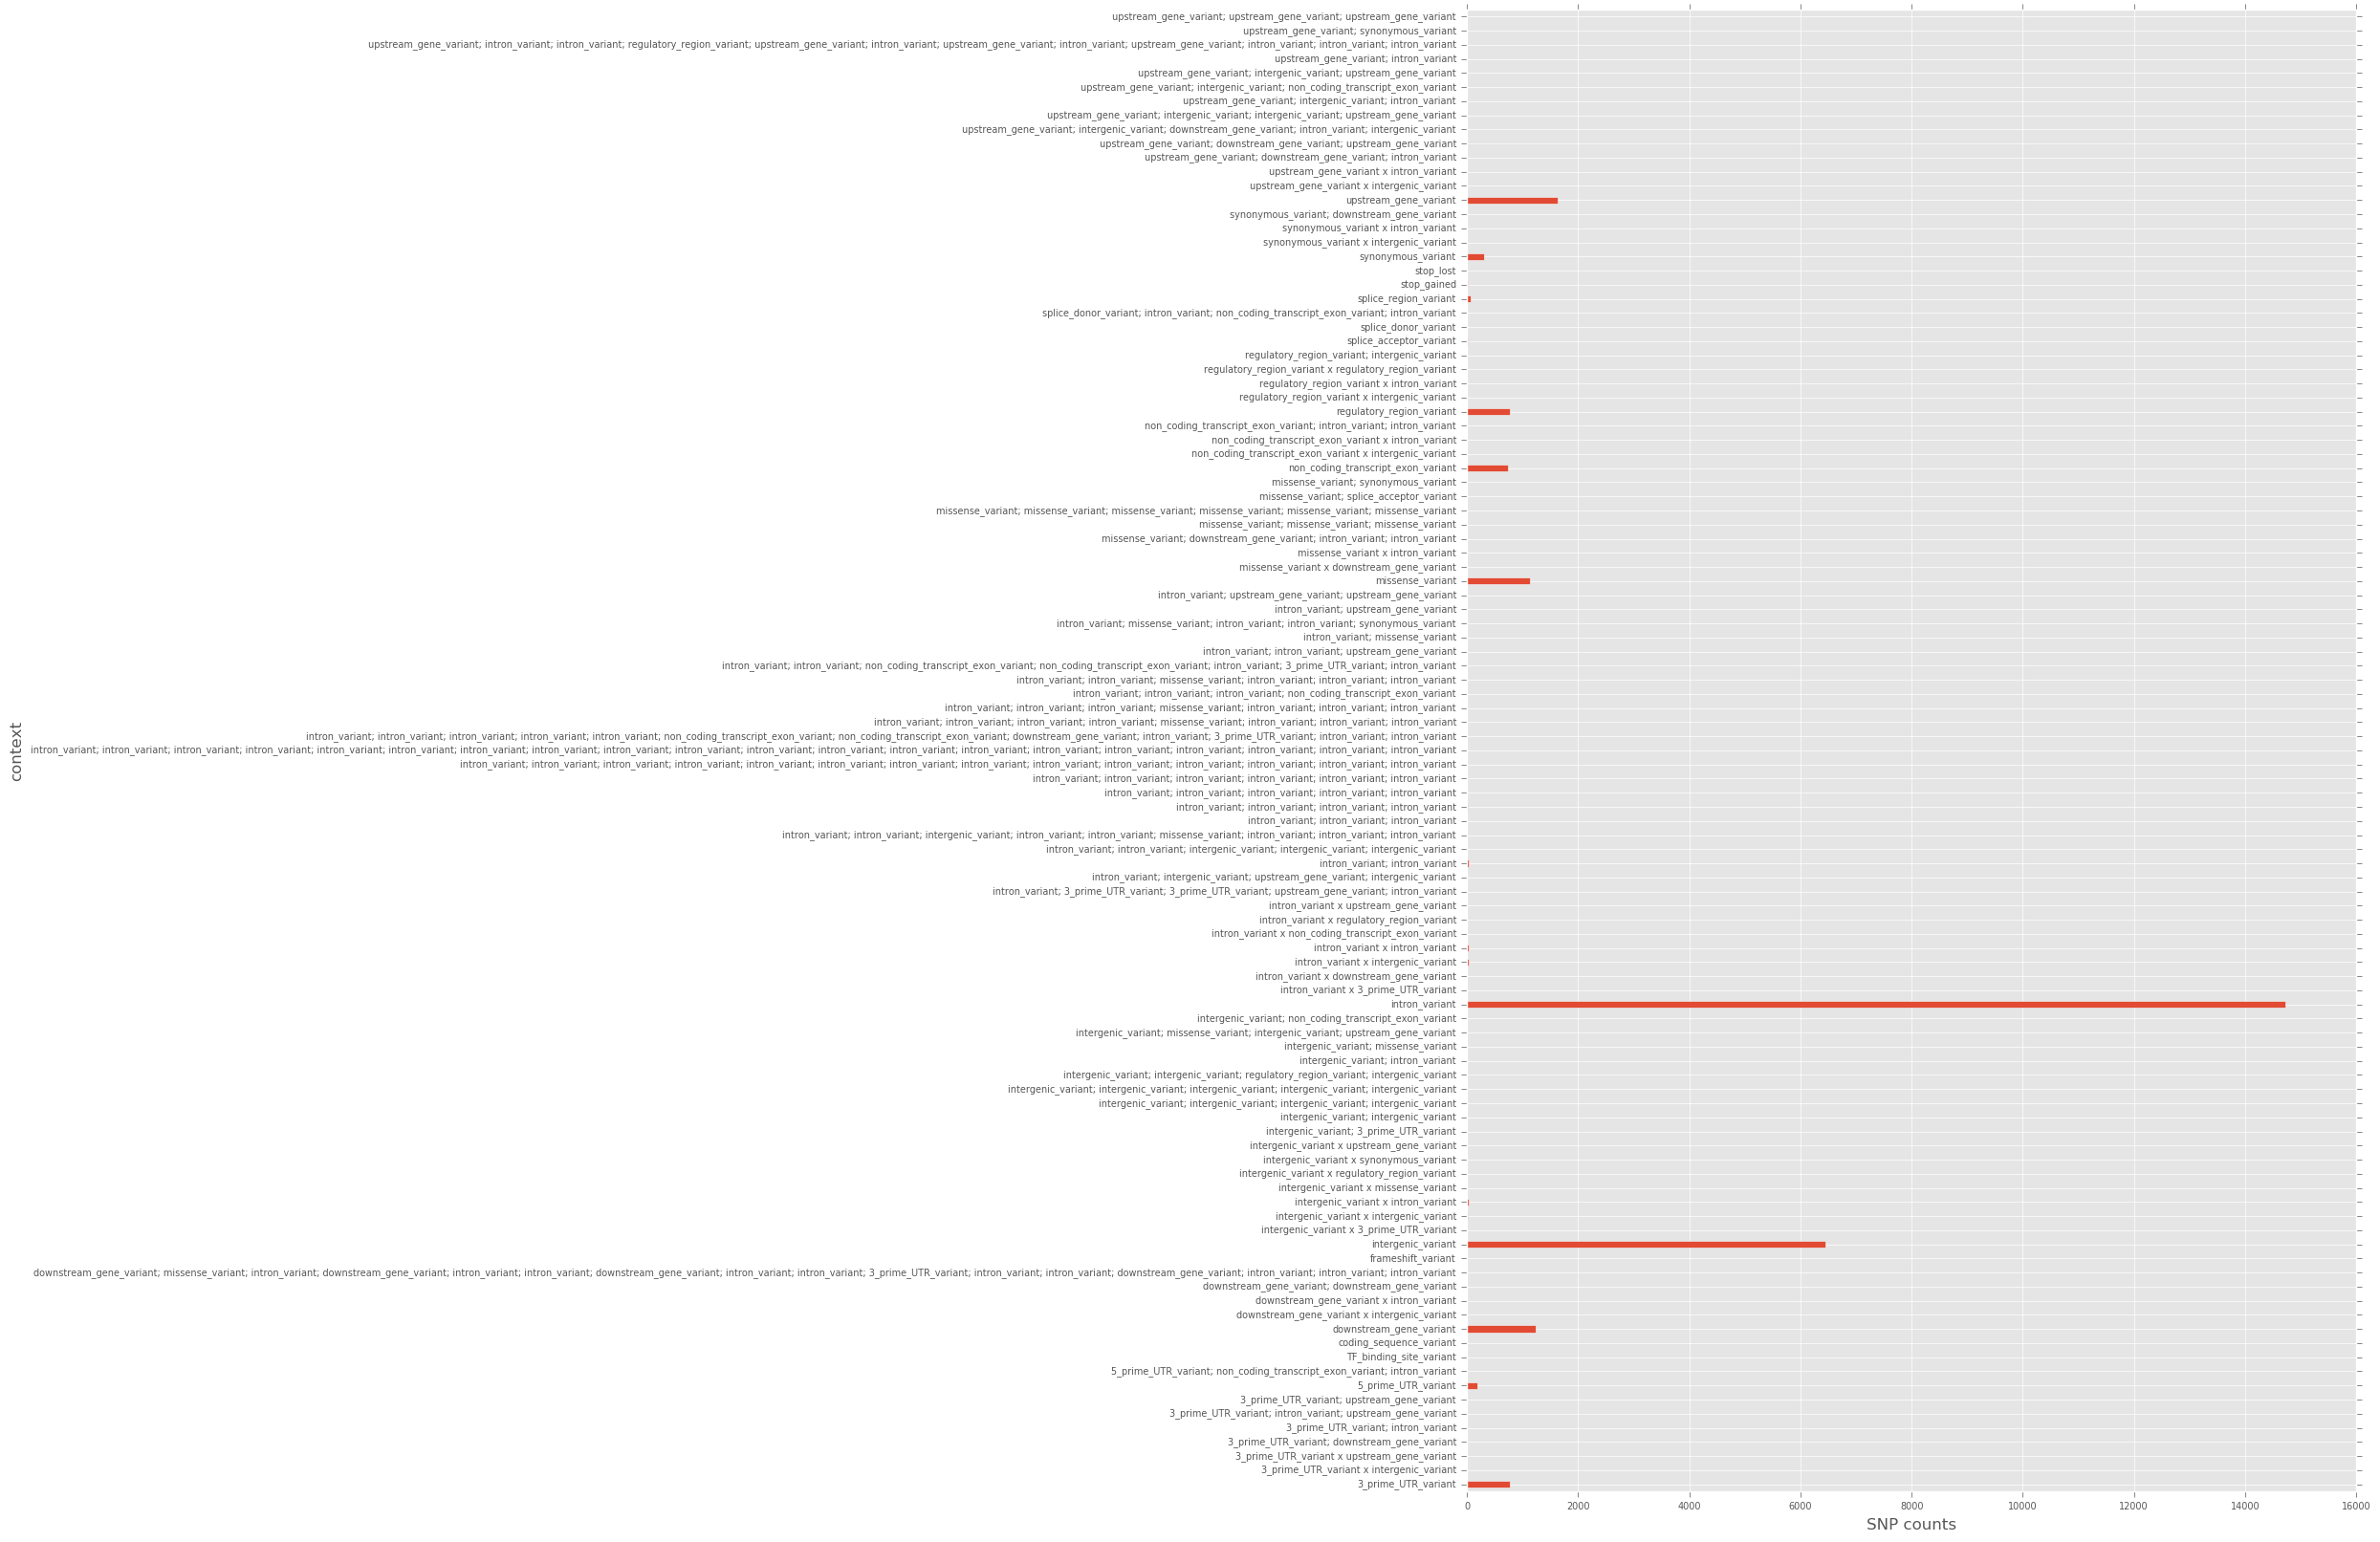

In [12]:
plot_trait=by_trait.count()['PUBMEDID'].plot(kind="barh", fontsize=13,figsize=(12,20))
plot_trait.tick_params(axis='both', which='major', labelsize=7)
plot_trait.tick_params(axis='both', which='minor', labelsize=7)

plt.xlabel('SNP counts')
plt.ylabel('context')

## Association

In [13]:
#snp_calls['name']
association=pd.merge(snp_calls[['name','chrom','position','genotype','chrom_sortkey']], gwas_df[['SNPS','DISEASE/TRAIT','STRONGEST SNP-RISK ALLELE','OR or BETA']],how='inner',left_on='name',right_on='SNPS', suffixes=['_23andMe','_gwas'])

In [14]:
association.head()

,name,chrom,position,genotype,chrom_sortkey,SNPS,DISEASE/TRAIT,STRONGEST SNP-RISK ALLELE,OR or BETA
0,rs4129148,X,910180,CG,X,rs4129148,Schizophrenia,rs4129148-C,3.230
1,rs5916687,X,4606138,G,X,rs5916687,Amyotrophic lateral sclerosis,rs5916687-?,1.220
2,rs7885458,X,6230474,T,X,rs7885458,Biochemical measures,rs7885458-G,0.230
3,rs7892812,X,8354253,A,X,rs7892812,Cognitive performance,rs7892812-?,NaN
4,rs5934505,X,8873826,T,X,rs5934505,Androgen levels,rs5934505-G,0.091


In [15]:
by_chr=association.groupby('chrom_sortkey')
by_chr.count().head()

,name,chrom,position,genotype,SNPS,DISEASE/TRAIT,STRONGEST SNP-RISK ALLELE,OR or BETA
chrom_sortkey,,,,,,,,
X,89,89,89,89,89,89,89,68
chr001,987,987,987,987,987,987,987,806
chr002,1052,1052,1052,1052,1052,1052,1052,843
chr003,670,670,670,670,670,670,670,533
chr004,583,583,583,583,583,583,583,466


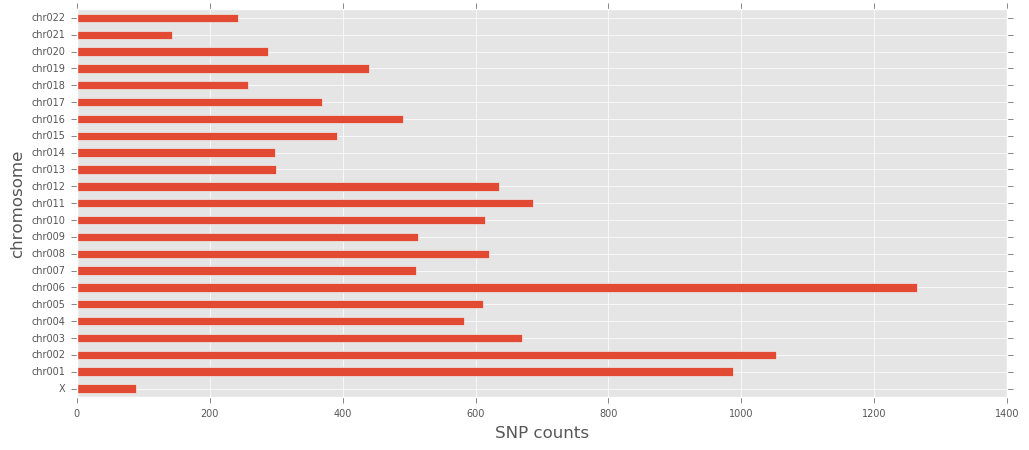

In [17]:
plot=by_chr.count()['name'].plot(kind="barh", fontsize=13,figsize=(12,5))
plot.tick_params(axis='both', which='major', labelsize=7)
plot.tick_params(axis='both', which='minor', labelsize=7)

plt.xlabel('SNP counts')
plt.ylabel('chromosome')